In [45]:
import numpy as np
from math import sqrt
import random
import matplotlib.pyplot as plt

In [46]:
def l_i(i, x, x_nodes):
    n = len(x_nodes)
    
    prod = 1
    for j in range(0, n):
        if j != i:
            prod = prod * (x - x_nodes[j]) / (x_nodes[i] - x_nodes[j])
            
    return prod

In [47]:
def L(x, x_nodes, y_nodes):
    n = len(x_nodes)
    
    sum = 0
    for i in range(0, n):
        sum = sum + y_nodes[i] * l_i(i, x, x_nodes)
        
    return sum

In [48]:
def p1Calculation(nodesXY):
    n = len(nodesXY)
    
    vectorList = []
    for i in range(0, 1000):
        krXY = np.zeros(n)
        for j in range(0, n):
            Z = random.gauss(0, 0.01)
            krXY[j] = nodesXY[j] + Z
        vectorList.append(krXY)
        
    return vectorList

In [49]:
def plotParagraph4b(x_nodes, y_list):
    fig, ax = plt.subplots(figsize=(12, 6))
    x_for_plotting = np.linspace(0, 1, 1000)
    
    ax.set_xlabel('x', fontsize = 'x-large')
    ax.set_ylabel('h(x)', fontsize = 'x-large')
  
    for i in range(0, 1000):
        ax.plot(x_for_plotting, [L(x, x_nodes, y_list[i]) for x in x_for_plotting], '-', linewidth = 0.5)

    ax.grid(True)
    plt.savefig('plotParagraph4b.pdf')

In [50]:
def meanCalculation(x, x_nodes, y_list):
    sum = 0
    for i in range(0, 1000):
        sum = sum + L(x, x_nodes, y_list[i])
    sum = sum / 1000
    
    return sum    

In [51]:
def confIntCalculation(x, x_nodes, y_list):
    mean = meanCalculation(x, x_nodes, y_list)
    sigma = 0
    for i in range(0, 1000):
        h_i = L(x, x_nodes, y_list[i])
        sigma = sigma + (h_i - mean) * (h_i - mean)
    sigma = sqrt(sigma / 1000)
    delta = 1.645 * sigma
    
    return mean - delta, mean, mean + delta

In [52]:
def plotParagraph4c(y_list, x_nodes, y_nodes):
    fig, ax = plt.subplots(figsize=(12, 6))
    x_for_plotting = np.linspace(0, 1, 1000)
    
    ax.set_xlabel('x', fontsize = 'x-large')
    ax.set_ylabel('h(x)', fontsize = 'x-large')

    h_l = []
    h_u = []
    for x in x_for_plotting:
        mean_l, mean, mean_u = confIntCalculation(x, x_nodes, y_list)
        h_l.append(mean_l)
        h_u.append(mean_u)
    
    ax.fill_between(x_for_plotting, h_u, h_l, color = 'lightgray')
    ax.plot(x_for_plotting, h_u,'-', color = 'r',  label = 'h_u(x)', linewidth = 1)
    ax.plot(x_for_plotting, h_l,'-', color = 'b', label = 'h_l(x)', linewidth = 1)
    
    ax.grid(True)
    ax.legend(loc='lower right')
    plt.savefig('plotParagraph4c.pdf')

In [53]:
def plotParagraph4d(y_list, x_nodes, y_nodes):
    fig, ax = plt.subplots(figsize=(12, 6))
    x_for_plotting = np.linspace(0, 1, 1000)
    
    ax.set_xlabel('x', fontsize = 'x-large')
    ax.set_ylabel('h(x)', fontsize = 'x-large')

    h_l = []
    mean_lu = []
    h_u = []
    for x in x_for_plotting:
        mean_l, mean, mean_u = confIntCalculation(x, x_nodes, y_list)
        h_l.append(mean_l)
        mean_lu.append(mean)
        h_u.append(mean_u)

    ax.plot(x_for_plotting, h_u,'-', color = 'r',  label = 'h_u(x)', linewidth = 1)
    ax.plot(x_for_plotting, mean_lu, '-', color = 'g', label = 'усреднённый интерполянт', linewidth = 1)
    ax.plot(x_for_plotting, h_l,'-', color = 'b', label = 'h_l(x)', linewidth = 1)
    ax.plot(x_nodes, y_nodes,'ro', label = '(x_nodes; y_nodes)', markersize = 6)
              
    ax.grid(True)
    ax.legend(loc='lower right')
    plt.savefig('plotParagraph4d.pdf')

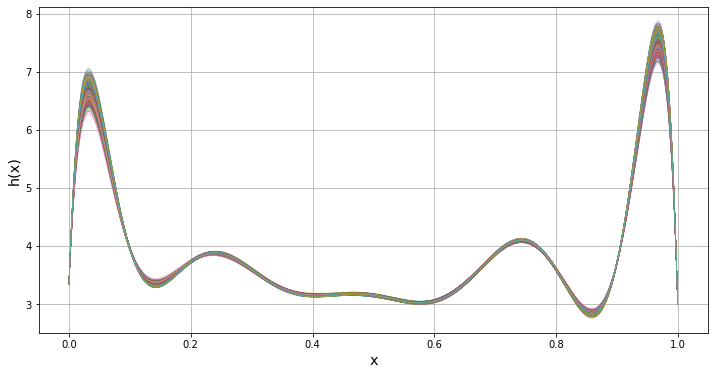

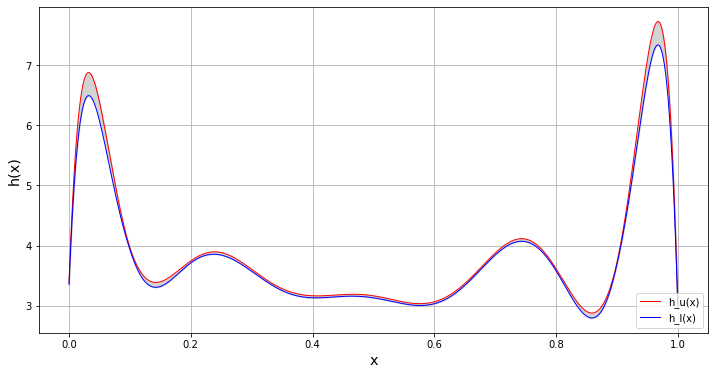

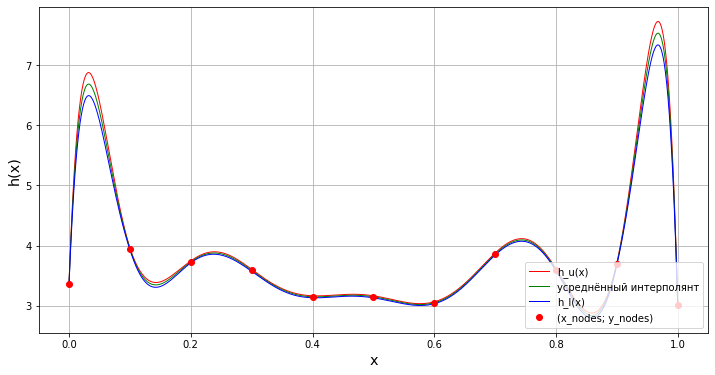

In [54]:
if __name__ == '__main__':
    x_nodes = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    y_nodes = [3.37, 3.95, 3.73, 3.59, 3.15, 3.15, 3.05, 3.86, 3.60, 3.70, 3.02]

    vectorList = p1Calculation(y_nodes)
    
    plotParagraph4b(x_nodes, vectorList)
    plotParagraph4c(vectorList, x_nodes, y_nodes)
    plotParagraph4d(vectorList, x_nodes, y_nodes)